In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../

/home/zeke/hello/work_helper


In [ ]:
# %pip install -e ~/hello/DynamicStateMachine/

In [3]:
from DynamicStateMachine import ExampleMachine
g = ExampleMachine()
g.next()
g.next(False)
g.next(False)
next(g)
next(g)
next(g)
next(g)

g.construct_graphvis()

ImportError: cannot import name 'ExampleMachine' from 'DynamicStateMachine' (/home/zeke/hello/DynamicStateMachine/src/DynamicStateMachine/__init__.py)

In [4]:
img_path = "/home/zeke/hello/DynamicStateMachine/example_graph"
g.construct_graphvis(graph_attrs=dict(format='png')).view(img_path)

NameError: name 'g' is not defined

In [5]:
%pip install DynamicStateMachine>=0.0.3 --upgrade
# %pip install -r ../requirements.txt --upgrade

Note: you may need to restart the kernel to use updated packages.


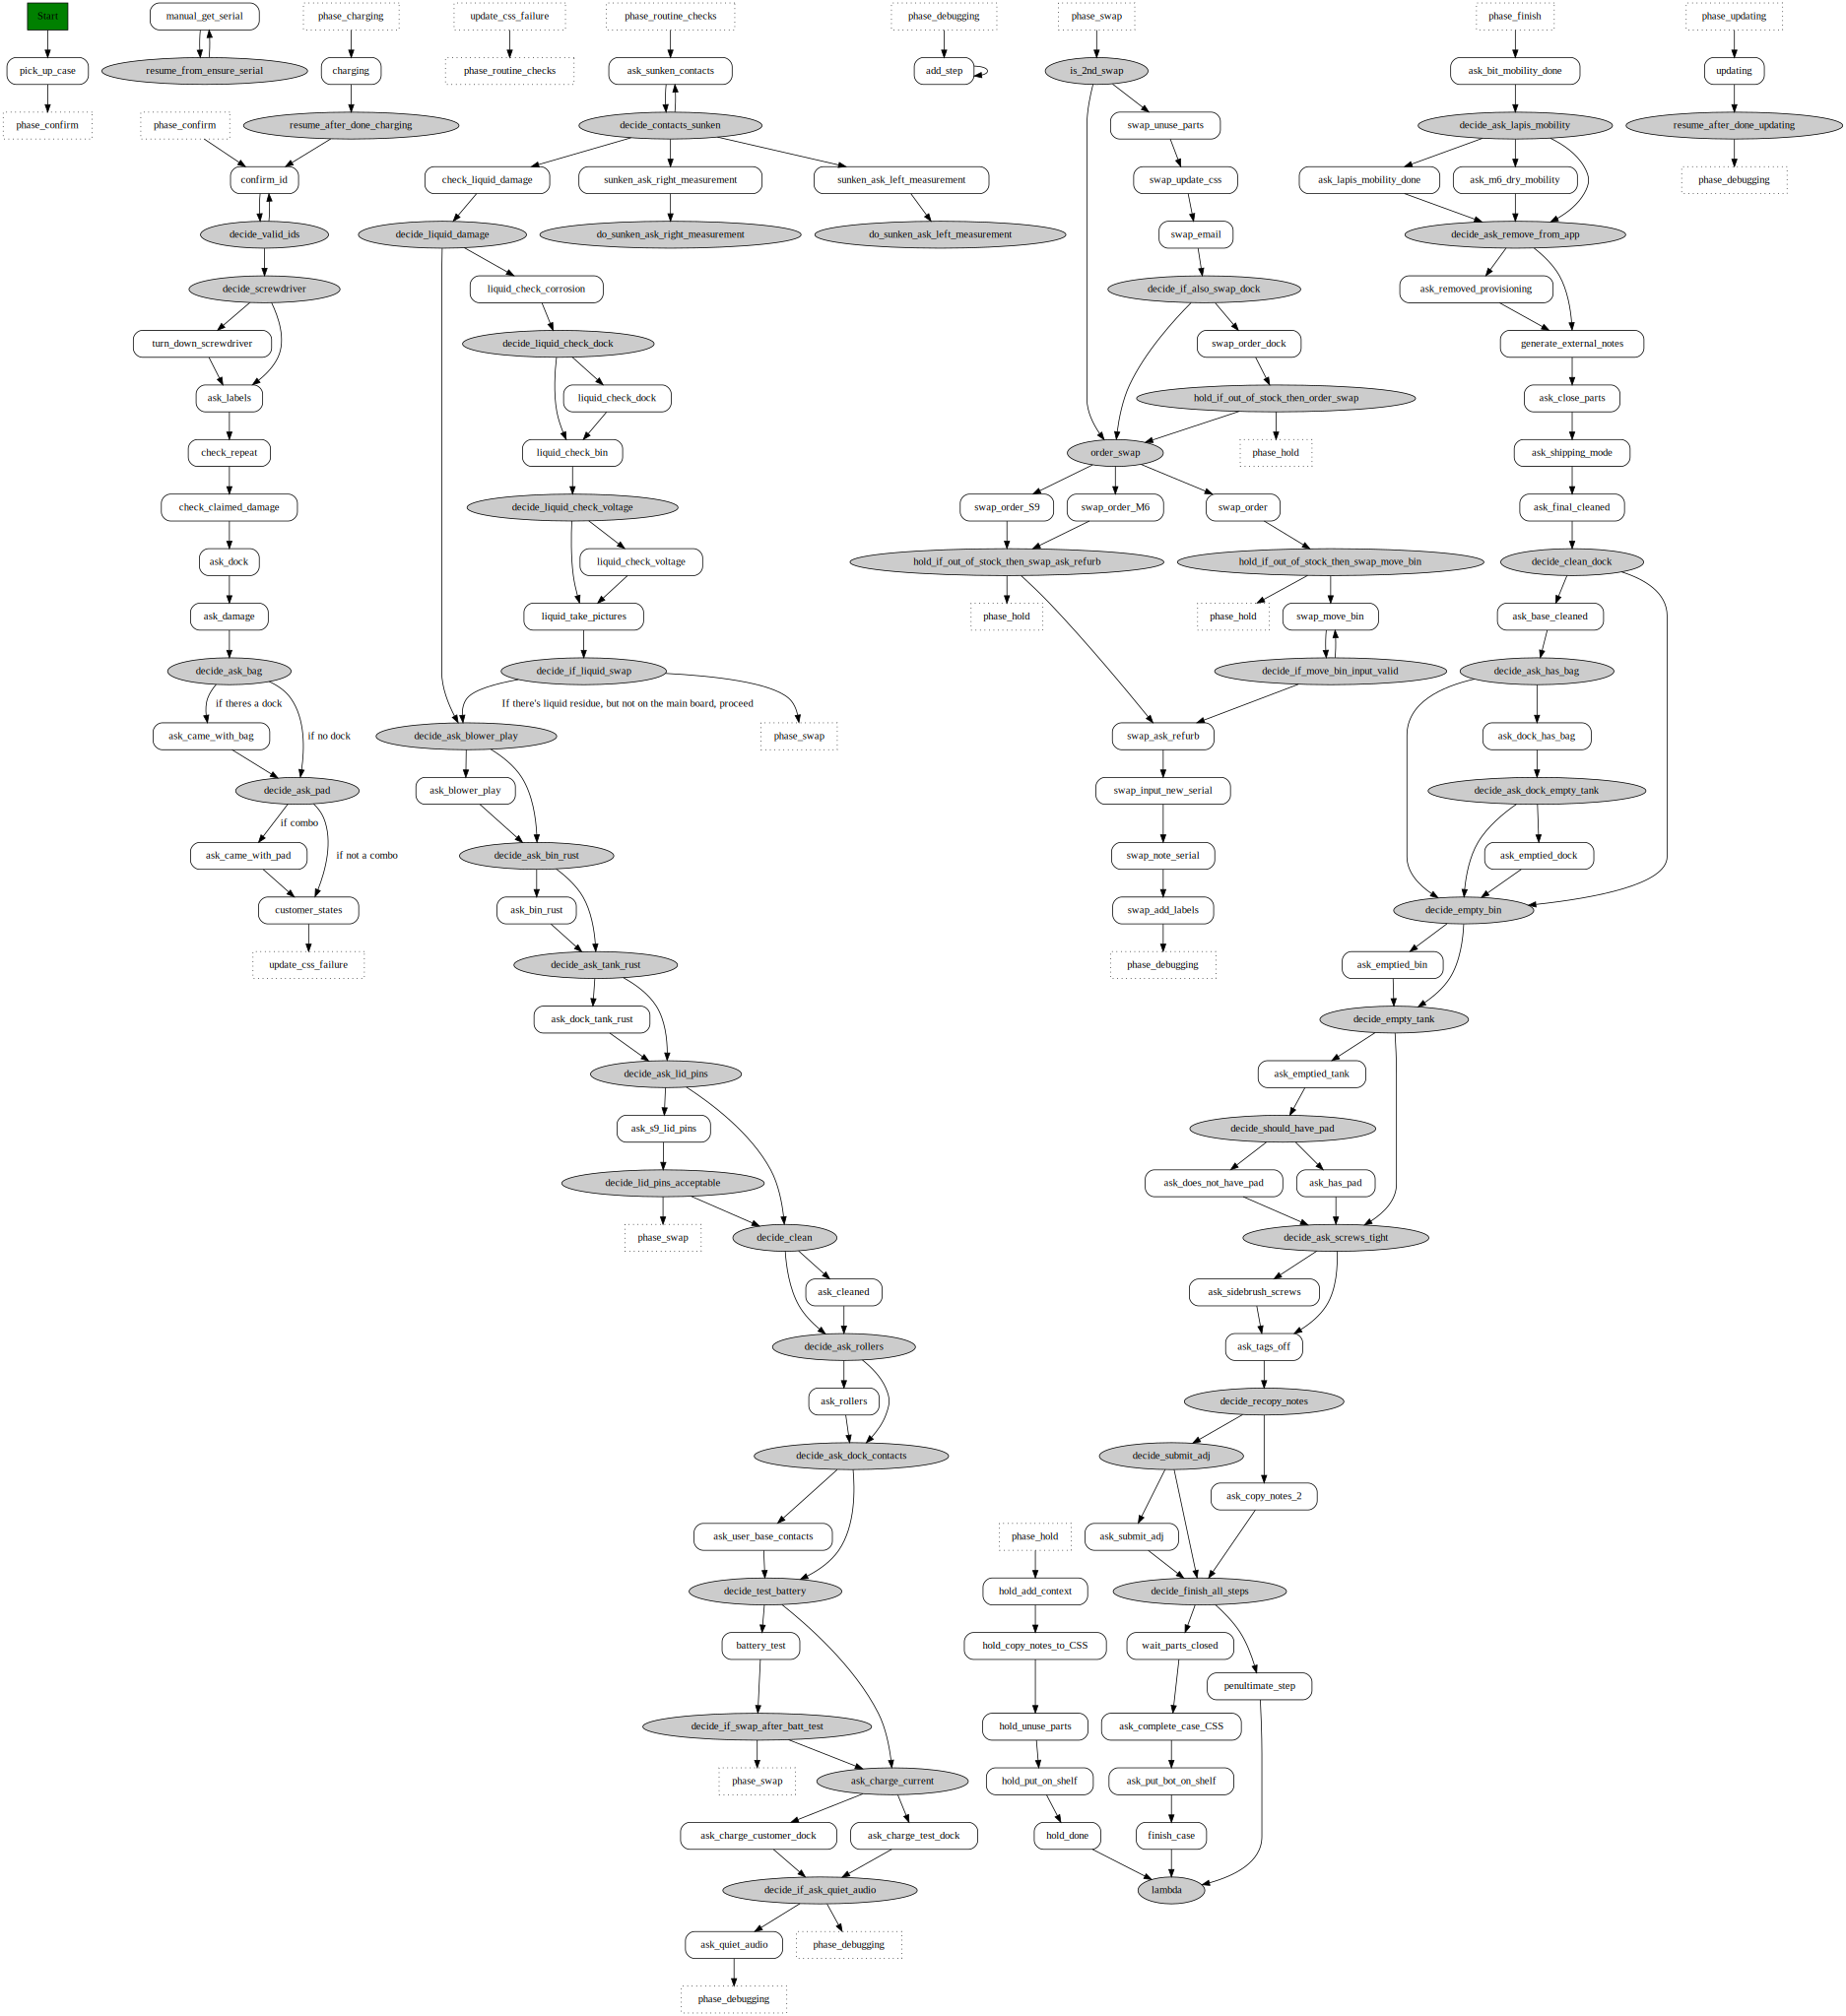

In [55]:
from helper.step_algorithm_v2 import StepsController
graph = StepsController(start_immediately=False)
graph.construct_graphvis(
    use_names=True,
    disconnect_virtual=True,
    split_ends=True,
    # highlighted=Steps.pick_up_case,
)
# graph

In [49]:
import dis

func = StepsController.do_sunken_ask_left_measurement # returns a variable which is set to a State
# func = StepsController.before_ask_put_bot_on_shelf # inline if statement
# function, which returns a State
print(StepsController.get_returns_dis(func))
print('-'*30)
print(dis.Bytecode(func).dis())

[('external_call', ''), ('resp', '')]
------------------------------
533           0 RESUME                   0

534           2 LOAD_FAST                0 (self)
              4 LOAD_ATTR                1 (NULL|self + do_ask_measurement)
             24 LOAD_CONST               1 (False)
             26 LOAD_FAST                1 (resp)
             28 CALL                     2
             36 RETURN_VALUE

